In [1]:
import math
import numpy as np
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt

SAMPLE_RATE=44100
PI = np.pi
duration=1
amp=1E4

# The total number of sample points that define your sound
nsamples = int(duration * SAMPLE_RATE)

# Range of the sound: nsamples points equaly spaced in the range
sample_space = np.linspace(0, duration, nsamples, endpoint=False)

def angular_freq(frequency):
    return 2*PI*frequency*sample_space

# Modulators

Modulation means altering certain characteristics of a sound wave, typically the amplitude, frequency, or phase of an audio signal, using a **modulating source.** This modulating source, often referred to as a modulator, affects the parameters of a **carrier waveform** (usually another audio signal) to create more complex and rich sound textures. We also have a **modulation index** which is a measure of  extent of modulation done on a carrier signal

### FM

In frequency modulation, the frequency of a signal is changed to encode information. The receiver decodes this information. We widely use this in FM radio broadcasting. 

5 year old explanation: let's say you and I have a string where each of us holds one end. If I pull on it in a constant pattern, say one tug per second, that would be our frequency. Now in order to send information we agree of a certain code (i.e A is two tugs in a second, B is three, C is four, etc.) Now to send you a message via string, I tug the appropriate number of times per second, varying the frequency of my tugs to match our code. This is frequency modulation in simple terms.

https://www.heavy.ai/technical-glossary/frequency-modulation

We can do the same thing with Amplitude, its called AM or amplitude modulation but it does not work as well as FM (This is meant to be an explicit Arctic Monkeys Reference)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

modulating_frequency = 5  # Modulating freq in Hz=
modulating_signal = np.sin(angular_freq(modulating_frequency))

carrier_frequency = 50  # in Hz
carrier_signal = np.sin(angular_freq(carrier_frequency))

# Frequency modulation
modulation_index = 1
modulated_signal = np.sin(2 * np.pi * (carrier_frequency + modulation_index * modulating_signal) * sample_space)

In [4]:
ipd.Audio(carrier_signal, rate=SAMPLE_RATE)

In [5]:
ipd.Audio(modulated_signal, rate=SAMPLE_RATE)

 ngl kinda sounds like my uncle kickstarting his Kinetic Honda

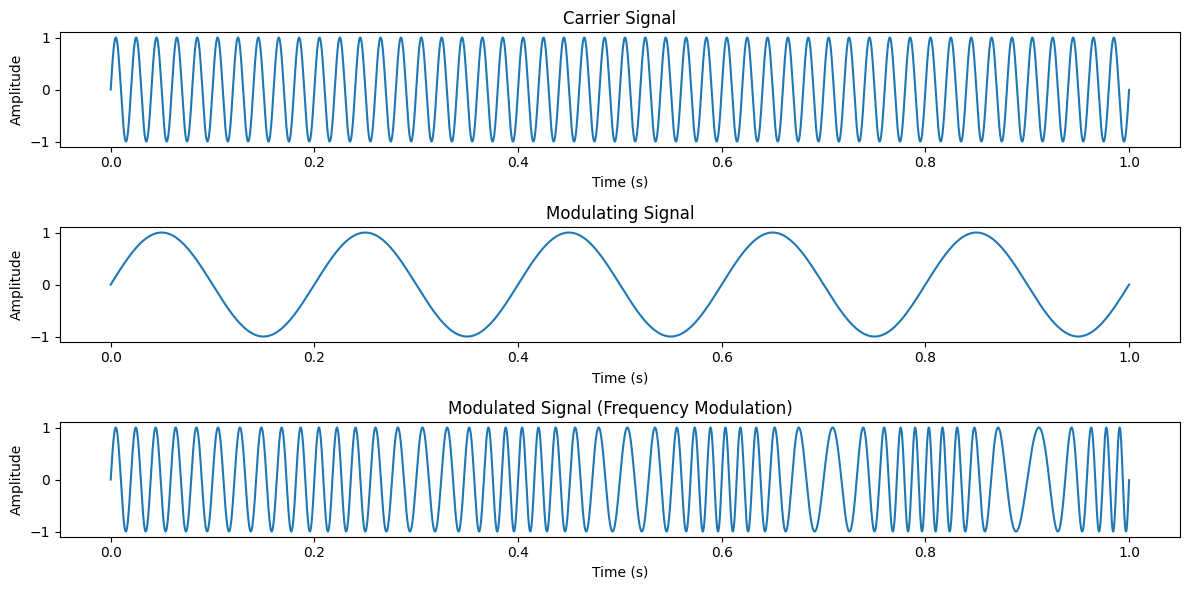

In [6]:
### PLOT IT SO YOU SEE WAVES (WAVE CHECK) ###
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(sample_space, carrier_signal)
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(sample_space, modulating_signal)
plt.title('Modulating Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(sample_space, modulated_signal)
plt.title('Modulated Signal (Frequency Modulation)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [42]:
def frequency_modulator(
    carrier_frequency,
    modulating_signal,
    modulation_index,
    sample_space
):
    return np.sin(2 * np.pi * (carrier_frequency + modulation_index * modulating_signal) * sample_space)

# Some weird FM sound
modulated_signal_fm = frequency_modulator(
    100,
    np.sin(angular_freq(40)),
    10,
    sample_space
)
# FM Sound
ipd.Audio(modulated_signal_fm, rate=SAMPLE_RATE)

### AM

In amplitude modulation, the amplitude of a carrier waveform is modulated by a separate modulating waveform.
The modulating waveform affects the volume or amplitude of the carrier waveform, creating harmonic sidebands around the carrier frequency.
When applied in a synthesizer, AM can produce metallic or bell-like sounds, and it's useful for creating a variety of tonal textures.

In [44]:
def amplitude_modulator(
    carrier_signal,
    modulating_signal,
    modulation_index, # Between 0,1
    sample_space
):
    return (1 + (modulation_index * modulating_signal)) * carrier_signal

# Some weird AM sound
carrier_signal = np.sin(angular_freq(50))
modulating_signal = np.sin(angular_freq(5))

modulated_signal_am = amplitude_modulator(
    carrier_signal,
    modulating_signal,
    1,
    sample_space
)
# FM Sound
ipd.Audio(modulated_signal_am, rate=SAMPLE_RATE)

 Arabella's got some interstellar-gator skin boots

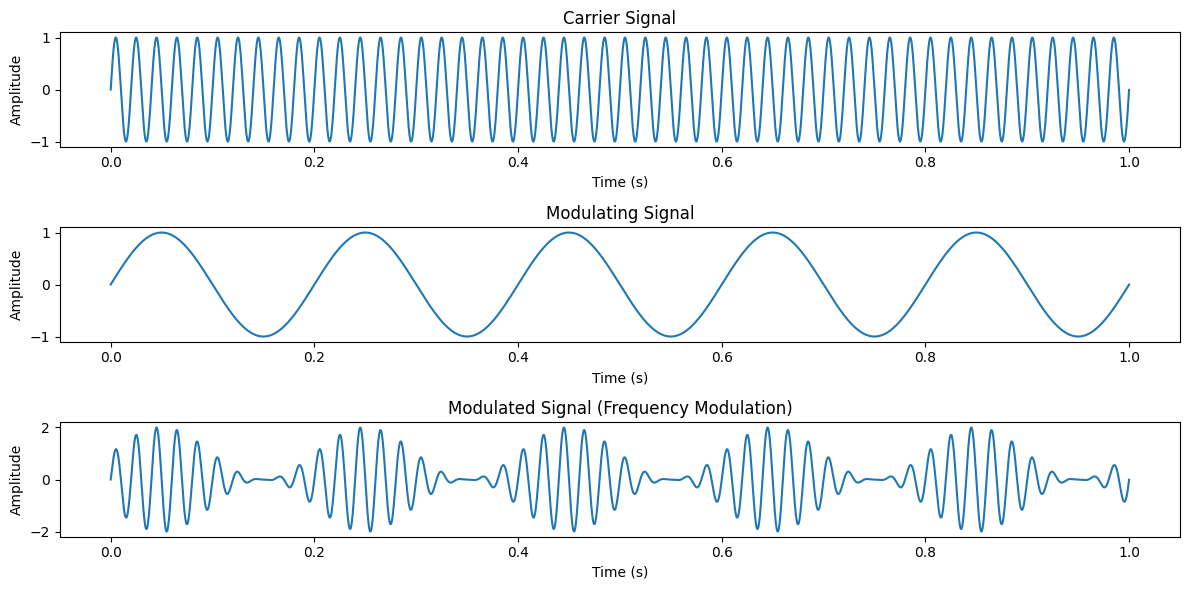

In [9]:
### PLOT IT SO YOU SEE WAVES (WAVE CHECK) ###
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(sample_space, carrier_signal)
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(sample_space, modulating_signal)
plt.title('Modulating Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(sample_space, modulated_signal_am)
plt.title('Modulated Signal (Frequency Modulation)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

###  <p style="text-align: center;">AM vs FM Signals</p>

![gif](https://upload.wikimedia.org/wikipedia/commons/a/a4/Amfm3-en-de.gif)

### Phase Modulation

In PM, the phase of the carrier signal is varied in proportion to the waveform being transmitted, which contains the information. Phase modulation is kinda similar to frequency modulation (FM) in the kinda sound it produces but varies the phase of the carrier wave rather than its frequency

**Modulation Frequency:** Modulation frequency refers to the frequency of the modulating signal or waveform that is used to vary the phase of the carrier wave

**Modulation Depth** Modulation depth, also known as phase deviation, represents the extent or amplitude of the phase variation induced by the modulating signal

SO, modulation frequency determines the speed of phase changes, while modulation depth controls the magnitude of these changes. Proper adjustment of these parameters is crucial to achieve the desired modulation characteristics.


In [92]:
# Generate a sine wave
frequency = 440.0  # Frequency of the sine wave (Hz)
sine_wave = np.sin(angular_freq(frequency))

modulation_frequency = 25  # Frequency of the modulation signal (Hz)
modulation_depth = 5  # Modulation depth (radians)

# Generate a modulation signal (sine wave for phase modulation)
modulation_signal = np.sin(2 * np.pi * modulation_frequency * sample_space)

# Phase modulation: Modulate the phase of the sine wave
phase_modulated_wave = np.sin(2 * np.pi * frequency * sample_space + modulation_depth * modulation_signal)

In [84]:
ipd.Audio(sine_wave, rate=SAMPLE_RATE)

In [93]:
ipd.Audio(phase_modulated_wave, rate=SAMPLE_RATE)

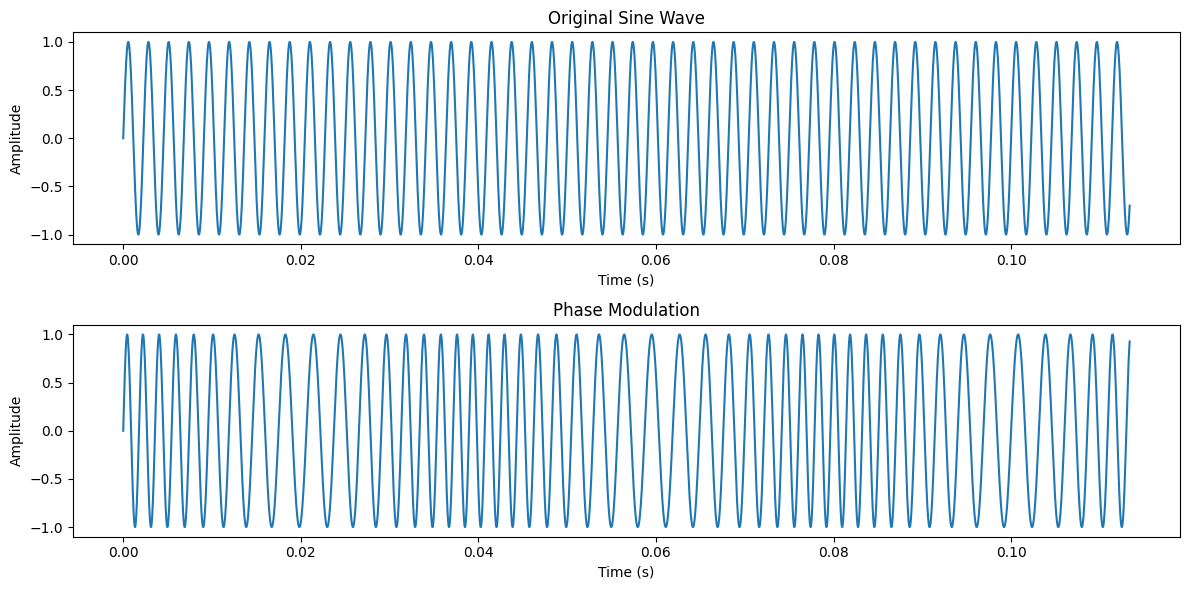

In [97]:
# Plot the original sine wave and the phase-modulated wave
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:5000], sine_wave[:5000])
plt.title('Original Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t[:5000], phase_modulated_wave[:5000])
plt.title('Phase Modulation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### What does this have to do with Music?

Modulation can be used to create very unique sounds and can allow changing of timbre without the use of filters! These harmonics would change depending on the kind of modulation and the signal used but in the end we can produce create more intricate and diverse sounds

Also you can chain modulations! Maybe you use a combination of amplitude and frequency modulation, or even more complex approaches like ring modulation or wavetable synthesis.

## Creating Effects

We can use Modulators to create effects and in this case we will use an LFO waves for modulation

LFOs are oscillators operating at lower frequencies below the audible range but that doesn't mean its useless, LFOs can act as modulators and introduces complex effects to the resulting sound. LFOs can create **Vibrato**, **Tremolo** and phasing effects!

When routed to control Pitch, LFOs can add a gentle, **expressive wobble** that adds emotion to the sound called Vibrato! By applying a sine wave LFO to the pitch parameter, we can create a pleasant vibrato effect. We can also tune the LFO's rate which determines how frequently the oscillation occurs/ speed of the vibrato, and the depth, which controls the amount of pitch variation.

In [33]:
frequency = 100

# ORIGINAL sine wave
sine_wave = np.sin(angular_freq(frequency)) * amp

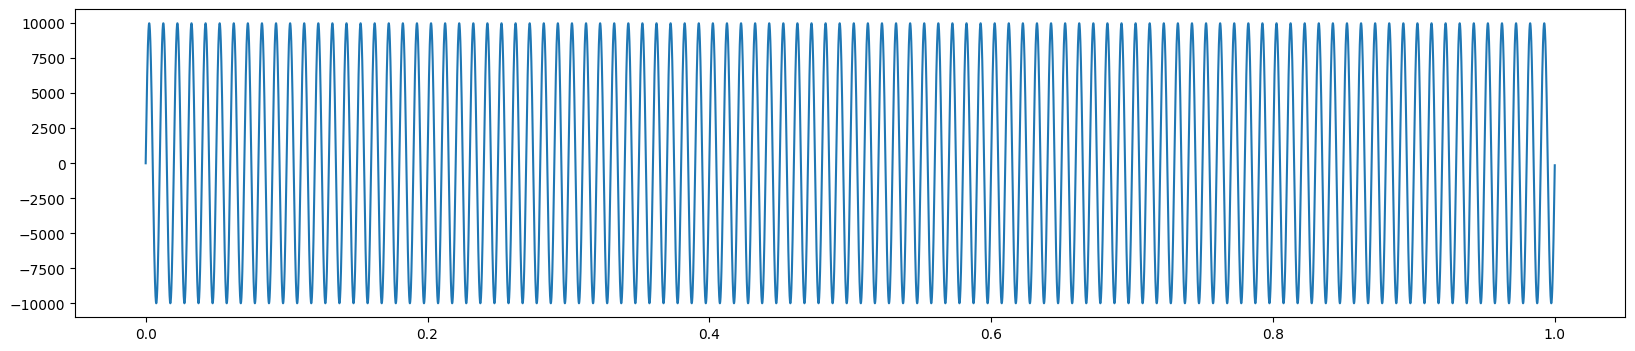

In [36]:
plt.figure(figsize=(20, 4))
plt.plot(sample_space, sine_wave)

In [37]:
ipd.Audio(sine_wave, rate=SAMPLE_RATE)

VIBRATO: Made by pulsating changes of frequency

In [41]:
# LFO parameters
lfo_frequency = 0.5  # Frequency of the LFO (Hz)
lfo_amplitude = 50.0  # Amplitude of the LFO modulation

# Generate the LFO (sinusoidal waveform)
lfo_signal = lfo_amplitude * np.sin(angular_freq(lfo_frequency))

# Modulate the frequency of the sine wave using the LFO
modulated_sine_wave = np.sin(angular_freq(frequency + lfo_signal))

# VIBRATO/ WOBBLE EFFECT
ipd.Audio(modulated_sine_wave, rate=SAMPLE_RATE)

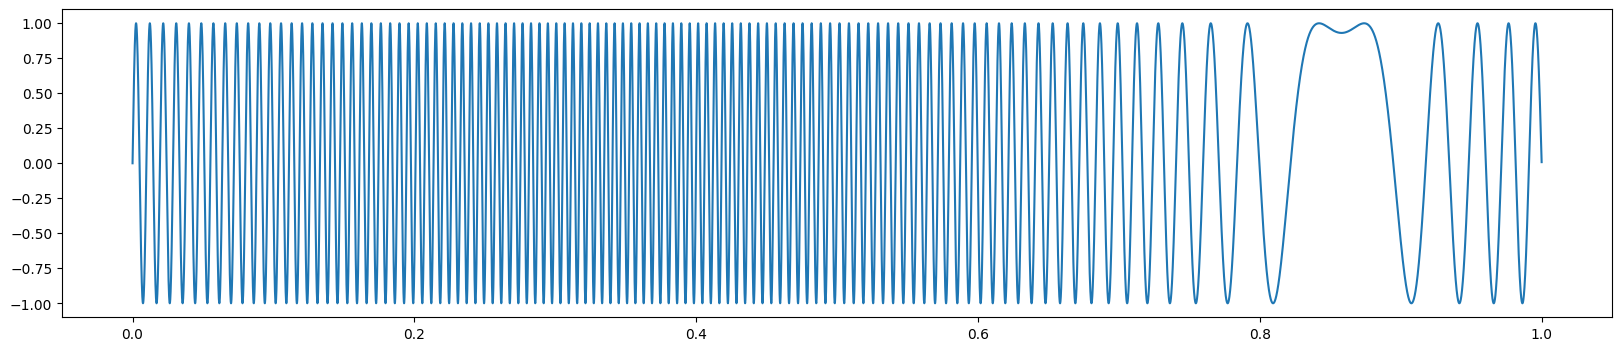

In [49]:
# Since Vibrato is a style of frequency modulation, it looks like this
plt.figure(figsize=(20, 4))
plt.plot(sample_space, modulated_sine_wave)

TREMOLO: Made by variation in amplitude of sound, also called underwater effect

In [43]:
# TREMOLO EFFECT
lfo_frequency = 10  # Frequency of the LFO (Hz)
amplitude_depth = 0.5  # Tremolo depth (0 to 1, where 1 is full amplitude modulation)

# Generate the LFO (sinusoidal waveform)
lfo_signal = 0.5 + 0.5 * np.sin(angular_freq(lfo_frequency))

# Modulate the Amplitude of the sine wave using the LFO
tremolo_wave = (1 - amplitude_depth) * sine_wave * lfo_signal

In [44]:
# TREMOLO EFFECT
ipd.Audio(tremolo_wave, rate=SAMPLE_RATE)

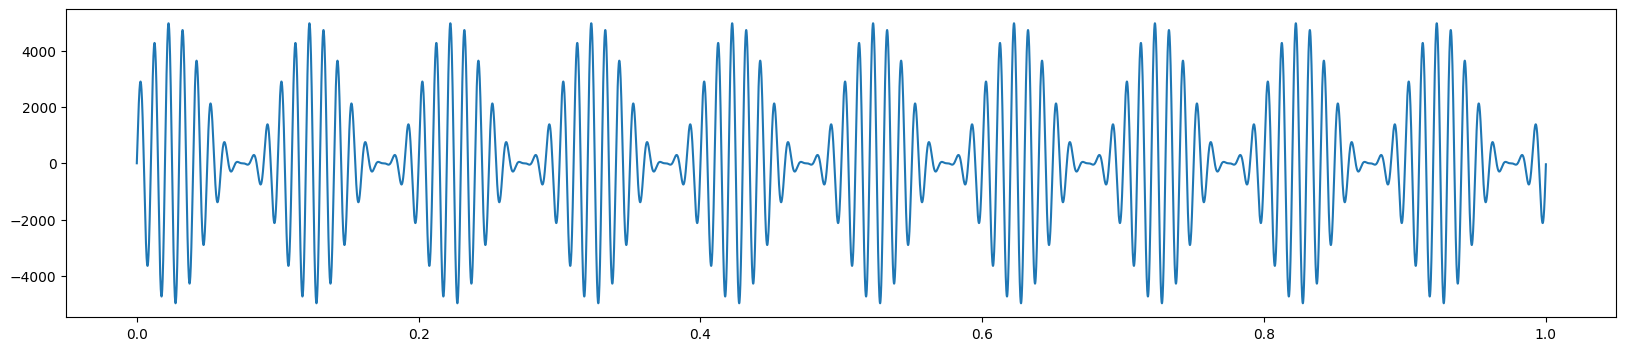

In [48]:
# Since Tremolo is a style of amplitude modulation, it looks like this 
plt.figure(figsize=(20, 4))
plt.plot(sample_space, tremolo_wave)